### Data Mining Lab, The Second (continued)
#### Name: Samarth Garg
#### Roll No: 2020IMT-085<br/>
Date: 06/09/2023

In [59]:
import pandas as pd

df = pd.read_csv("./data/data2.csv")
df_main = pd.read_csv("./data/data2.csv")

df.head()

,Roll,PI_Th,PI_Lab,PII_Th,PII_Lab,PIII_Th,PIII_Lab
0,img_2020001,5.097183,3.583333,5.466667,4.00,5.038333,1.666667
1,img_2020002,0.956032,0.000000,6.475000,4.75,4.923333,-5.000000
2,img_2020003,8.184841,4.916667,8.747222,5.50,6.213333,3.333333
3,img_2020004,6.014286,0.000000,4.208333,1.50,3.911666,0.000000
4,img_2020005,3.862956,4.866667,7.175000,4.60,5.491666,3.333333


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Roll      275 non-null    object 
 1   PI_Th     275 non-null    float64
 2   PI_Lab    275 non-null    float64
 3   PII_Th    275 non-null    float64
 4   PII_Lab   275 non-null    float64
 5   PIII_Th   275 non-null    float64
 6   PIII_Lab  275 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.2+ KB


In [10]:
'''
1. Normalize the data using μσ normalization.
'''
integer_cols = df[['PI_Th',	'PI_Lab',	'PII_Th',	'PII_Lab',	'PIII_Th',	'PIII_Lab']]

mean_df = integer_cols.mean(axis=0)
std_df = integer_cols.std(axis=0)

df[integer_cols.columns] = (integer_cols - mean_df)/std_df
df.head()

,Roll,PI_Th,PI_Lab,PII_Th,PII_Lab,PIII_Th,PIII_Lab
0,img_2020001,0.011382,0.213148,-0.534331,-0.271207,0.068148,-0.476249
1,img_2020002,-1.724713,-1.030918,0.022020,-0.008533,0.023428,-2.792223
2,img_2020003,1.305821,0.676057,1.275728,0.254141,0.525067,0.102745
3,img_2020004,0.395859,-1.030918,-1.228621,-1.146787,-0.369975,-1.055242
4,img_2020005,-0.506043,0.658698,0.408248,-0.061068,0.244435,0.102745


In [60]:
'''
2. Find the distance between all pairs of students. Print all details of student-pair that is
furthest apart (use normalized values for calculations, however, print unnormalized values).
'''
import numpy as np
from collections import defaultdict

def distance(x, y):
    return np.sqrt(np.sum(np.square(x-y)))

distance_dict = defaultdict(list)
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        distance_dict[row1['Roll']].append(distance(np.array(row1.iloc[1:]), np.array(row2.iloc[1:])))

all_rolls = df['Roll']

max_distance = 0

for roll, distances in distance_dict.items():
    _distance = np.max(distances)
    if max_distance < _distance:
        max_distance = _distance
        pair_with_max_distance = [roll, all_rolls[np.argmax(distances)]]
        
print(df_main[pair_with_max_distance[0] == df.Roll])
print(df_main[pair_with_max_distance[1] == df.Roll])

           Roll     PI_Th     PI_Lab     PII_Th  PII_Lab  PIII_Th  PIII_Lab
26  img_2020027  8.129385  10.266667  10.353611     14.2   15.575  6.666667
           Roll    PI_Th  PI_Lab  PII_Th  PII_Lab  PIII_Th  PIII_Lab
68  img_2020069  0.63625     0.0  1.2575      0.0      0.0       0.0


In [72]:
'''
3. For every student find the average distance to the closest 10 students. Compute the mean
(say μ) and standard deviation (say σ) of the distance for all students.
'''

closest_10_students = {}
for roll, distances in distance_dict.items():
    closest_10=np.mean(np.sort(distances)[1:11])
    closest_10_students[roll] = closest_10

mu = np.mean(np.array(list(closest_10_students.values())))
sigma = np.std(np.array(list(closest_10_students.values())))
print(f'Mean of the distance of all the students: {mu}')
print(f'Standard deviation of the distance of all the students: {sigma}')

Mean of the distance of all the students: 1.2031731121528082
Standard deviation of the distance of all the students: 0.4883204528861886


In [87]:
'''
4. For every student find the average distance to the closest 10 students. Count the number of
students (as a percentage of class population) for which the distance is greater than μ + 2σ,
where μ and σ are obtained from the above question. Print all details of all students
qualifying as per the mentioned criterion (use normalized values for calculations, however,
print unnormalized values). Delete the students from the dataset (only for this question).
'''

counter = 0
valid_students, idxs = [], []
threshold_distance = mu + 2 * sigma

for idx, (roll, closest_10) in enumerate(closest_10_students.items()):
    if closest_10 > threshold_distance:
        counter += 1
        valid_students.append(roll)
        idxs.append(idx)

print(f'the number of \
students (as a percentage of class population) for which the distance is greater than μ + 2σ : {counter/len(closest_10_students)*100} %')
print()
print("Details of all students \
qualifying as per the mentioned criterion")
df_main.iloc[idxs]

the number of students (as a percentage of class population) for which the distance is greater than μ + 2σ : 4.0 %

Details of all students qualifying as per the mentioned criterion


,Roll,PI_Th,PI_Lab,PII_Th,PII_Lab,PIII_Th,PIII_Lab
26,img_2020027,8.129385,10.266667,10.353611,14.20,15.575000,6.666667
73,img_2020074,6.988829,4.333333,8.386111,15.00,6.350476,9.666667
81,img_2020082,9.158036,9.866667,8.425833,9.50,15.370001,10.000000
114,img_2020115,6.299464,11.200000,8.530200,15.00,7.791666,8.333333
115,img_2020116,4.554782,6.733333,7.061111,10.10,11.516667,6.666667
117,img_2020118,5.445476,3.266667,6.394444,7.95,5.500000,-5.000000
120,img_2020121,-1.963790,5.133333,5.111111,11.00,6.420000,3.333333
138,imt_2020014,1.911032,13.533333,9.055556,11.80,9.516667,9.333333
196,imt_2020072,9.754405,6.200000,6.286944,5.30,14.086667,6.666667
244,imt_2020120,7.680337,0.750000,8.600000,4.00,8.083333,-5.000000


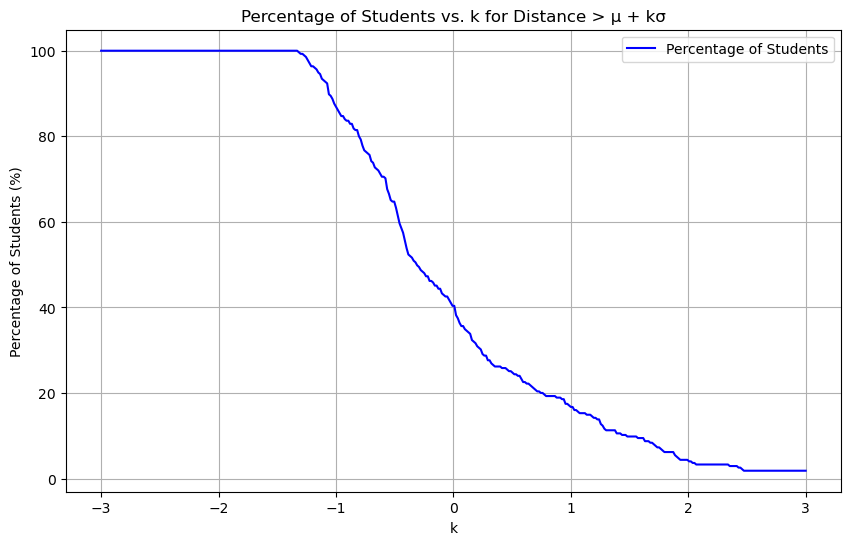

In [103]:
'''
5. For every student find the average distance to the closest 10 students. Count the number of
students (as a percentage of class population) for which the distance is greater than μ + k
σ, where μ and σ are obtained from the above question. For different values of k, plot the
graph of student count v/s k.
'''
import matplotlib.pyplot as plt

k = np.linspace(-3, 3, 400)

counts = []
for i in k:
    threshold_distance = mu + i * sigma
    counter = 0
    for roll, closest_10 in closest_10_students.items():
        if closest_10 > threshold_distance:
            counter += 1
    counts.append(counter/len(closest_10_students)*100)

plt.figure(figsize=(10, 6))
plt.plot(k, counts, '-b', label='Percentage of Students')
plt.xlabel('k')
plt.ylabel('Percentage of Students (%)')
plt.title('Percentage of Students vs. k for Distance > μ + kσ')
plt.grid(True)
plt.legend()
plt.show()


In [135]:
'''
6. For every student find the average distance to the closest 10 students. Count the number of
students (as a percentage of class population) for which the distance is less than μ - 2σ,
where μ and σ are obtained from the above question. Delete all neighboring students
appearing in the count WITHOUT deleting the student used to calculate the neighbors(only
for this question). Solve repeatedly until the criterion cannot be satisfied for any student.
Print all details of all students remaining in the dataset (use normalized values for
calculations, however, print unnormalized values).
'''

import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix

students_to_delete = set()
df = df[integer_cols.columns]

while True:
    distances_current = distance_matrix(df.values, df.values)
    avg_distances_to_10_closest = [np.mean(sorted(row)[:11]) for row in distances_current]
    students_below_threshold = np.where(np.array(avg_distances_to_10_closest) < mu - 2 * sigma)[0]
    
    if len(students_below_threshold) == 0:
        break
    new_students_to_delete = set()

    for student_index in students_below_threshold:
        closest_students = np.argsort(distances_current[student_index])[:11]        
        closest_students = [s for s in closest_students if s != student_index]      
        new_students_to_delete.update(closest_students)
    if len(new_students_to_delete - students_to_delete) == 0:
        break
    students_to_delete.update(new_students_to_delete)
    df = df.drop(index=df.index[list(students_to_delete)])

remaining_students = df.drop(index=list(students_to_delete))

remaining_students

,PI_Th,PI_Lab,PII_Th,PII_Lab,PIII_Th,PIII_Lab
0,5.097183,3.583333,5.466667,4.00,5.038333,1.666667
1,0.956032,0.000000,6.475000,4.75,4.923333,-5.000000
2,8.184841,4.916667,8.747222,5.50,6.213333,3.333333
3,6.014286,0.000000,4.208333,1.50,3.911666,0.000000
4,3.862956,4.866667,7.175000,4.60,5.491666,3.333333
...,...,...,...,...,...,...
270,4.030258,0.750000,6.777778,2.65,4.110000,1.666667
271,5.325516,3.583333,7.933333,5.50,5.650000,6.666667
272,5.104464,2.083333,3.341667,2.60,0.638333,3.000000
273,3.463591,0.000000,6.716667,1.45,3.738333,1.333333


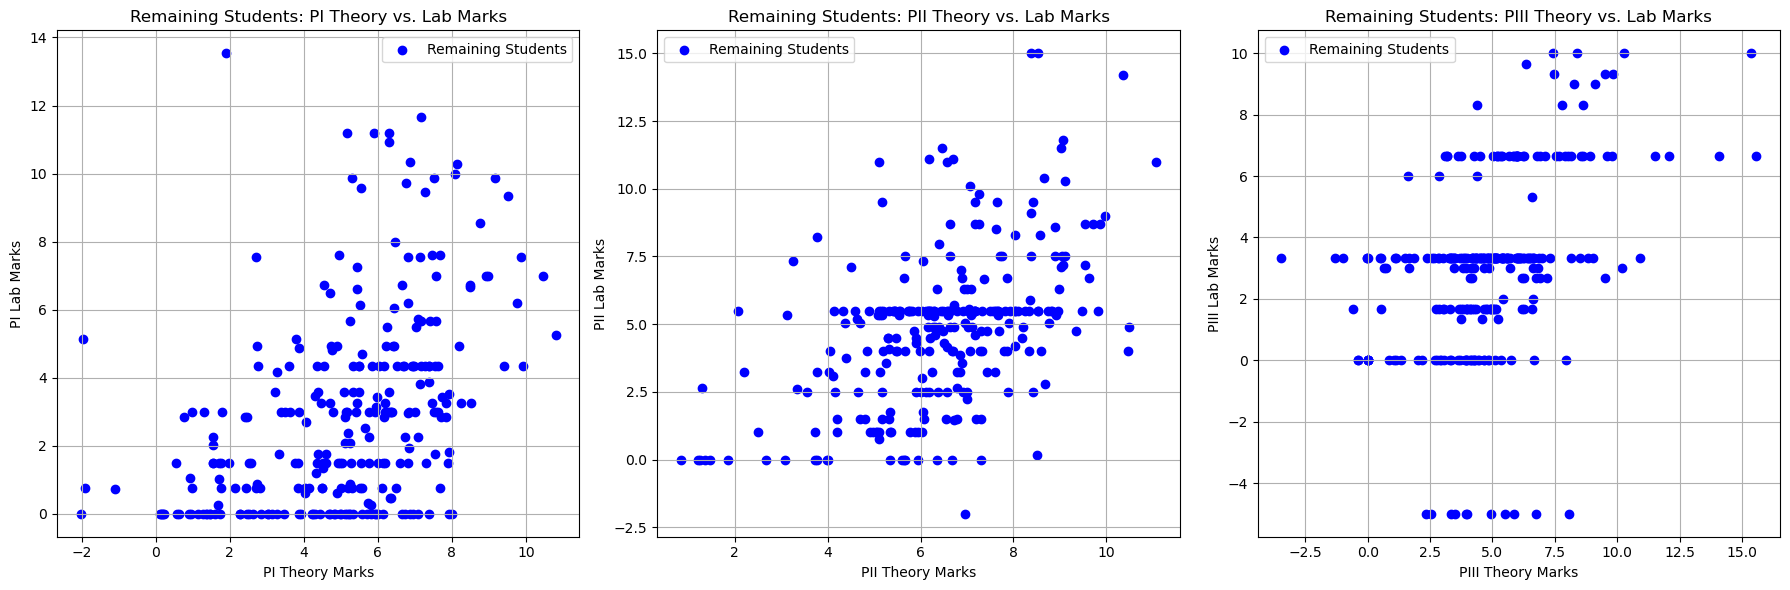

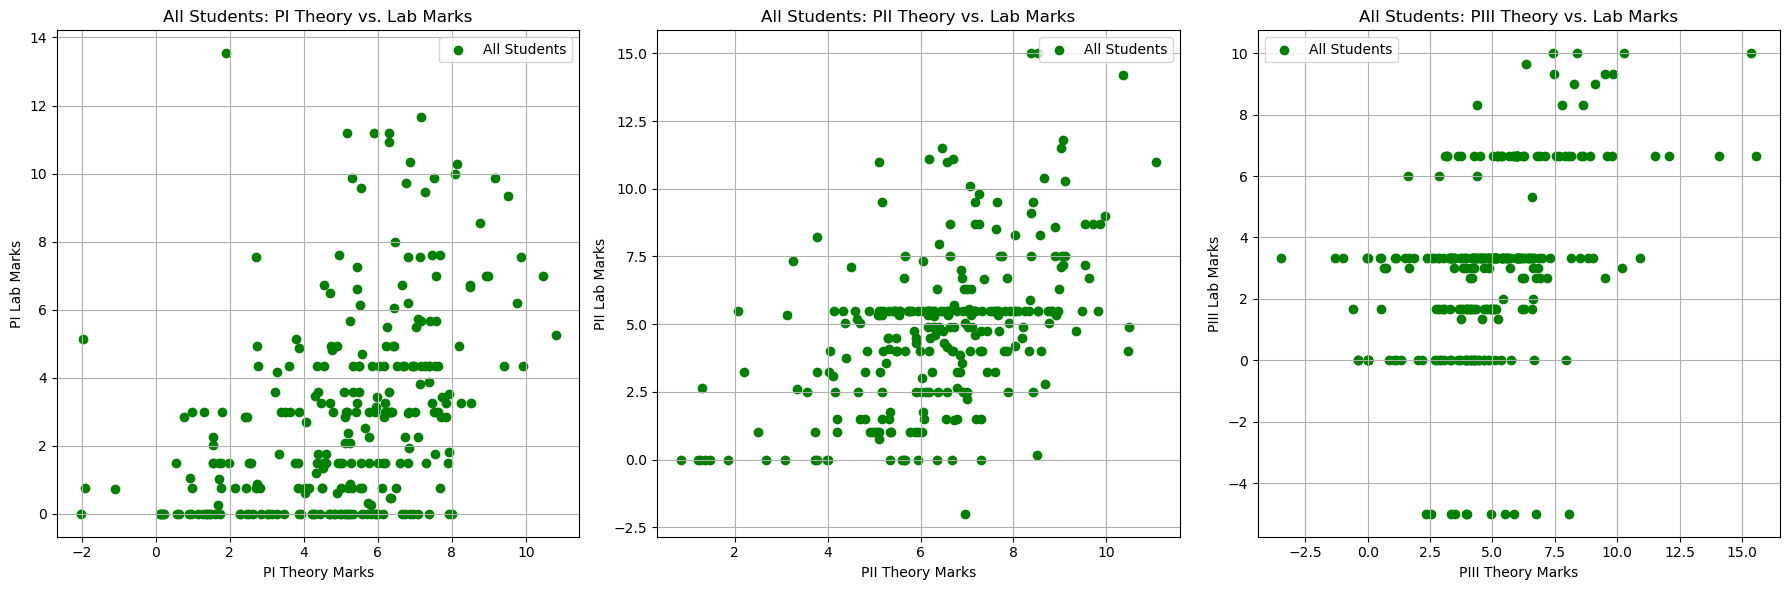

In [132]:
'''
7. For the students remaining from the above question, plot the theory marks v/s lab marks as
a scatter plot. Repeat for all students in the dataset.
'''
import matplotlib.pyplot as plt

remaining_theory_PI = remaining_students["PI_Th"]
remaining_lab_PI = remaining_students["PI_Lab"]

remaining_theory_PII = remaining_students["PII_Th"]
remaining_lab_PII = remaining_students["PII_Lab"]

remaining_theory_PIII = remaining_students["PIII_Th"]
remaining_lab_PIII = remaining_students["PIII_Lab"]

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(remaining_theory_PI, remaining_lab_PI, color='blue', label='Remaining Students')
plt.title('Remaining Students: PI Theory vs. Lab Marks')
plt.xlabel('PI Theory Marks')
plt.ylabel('PI Lab Marks')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(remaining_theory_PII, remaining_lab_PII, color='blue', label='Remaining Students')
plt.title('Remaining Students: PII Theory vs. Lab Marks')
plt.xlabel('PII Theory Marks')
plt.ylabel('PII Lab Marks')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(remaining_theory_PIII, remaining_lab_PIII, color='blue', label='Remaining Students')
plt.title('Remaining Students: PIII Theory vs. Lab Marks')
plt.xlabel('PIII Theory Marks')
plt.ylabel('PIII Lab Marks')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(df["PI_Th"], df["PI_Lab"], color='green', label='All Students')
plt.title('All Students: PI Theory vs. Lab Marks')
plt.xlabel('PI Theory Marks')
plt.ylabel('PI Lab Marks')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(df["PII_Th"], df["PII_Lab"], color='green', label='All Students')
plt.title('All Students: PII Theory vs. Lab Marks')
plt.xlabel('PII Theory Marks')
plt.ylabel('PII Lab Marks')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(df["PIII_Th"], df["PIII_Lab"], color='green', label='All Students')
plt.title('All Students: PIII Theory vs. Lab Marks')
plt.xlabel('PIII Theory Marks')
plt.ylabel('PIII Lab Marks')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

